In [1]:
import pandas as pd 
import numpy as np 
import re 
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df=pd.read_csv("MGB.csv")

UNIVARIATE ANALYSIS FOR CATEGORICAL DATA:

In bar chart we are representing the x-axis as area and y-axis as no.of .property count it is having.
Here we can observe aya nagar which is having highest no.of.property share and remaining all are having equal share in property area.

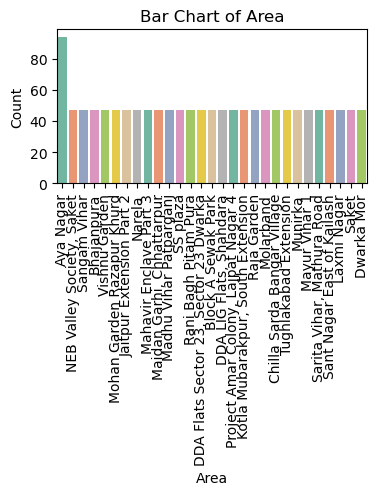

In [24]:
Area_counts = df['Area'].value_counts()
plt.figure(figsize=(4, 2))
sns.barplot(x=Area_counts.index,y= Area_counts.values,hue=Area_counts.index, palette='Set2')

plt.xlabel("Area")
plt.ylabel("Count")
plt.title("Bar Chart of Area")
plt.xticks(rotation=90)

plt.show()

Pie charts explains us about the proportion of each category.Here semi-furnished flats are more compared to the furnished and unfurnished .

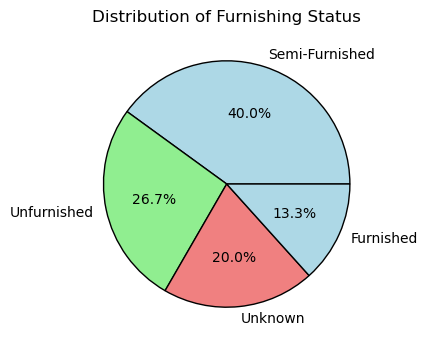

In [26]:
furnishing_counts = df['Furnishing_status'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(furnishing_counts.values, labels=furnishing_counts.index, autopct='%1.1f%%', 
        colors=['lightblue', 'lightgreen', 'lightcoral'], wedgeprops={'edgecolor': 'black'})

plt.title("Distribution of Furnishing Status")

plt.show()

The count plot shows that each owner has an equal share of properties, indicating a uniform distribution of property ownership.

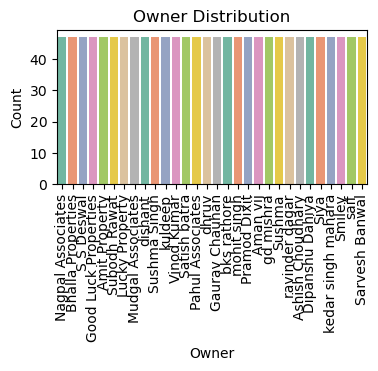

In [28]:
plt.figure(figsize=(4, 2))

# Count plot using Seaborn (fixing the FutureWarning)
sns.countplot(x='Owner', data=df, hue='Owner', palette='Set2', legend=False)

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Labels and title
plt.xlabel("Owner")
plt.ylabel("Count")
plt.title("Owner Distribution")

# Show plot
plt.show()

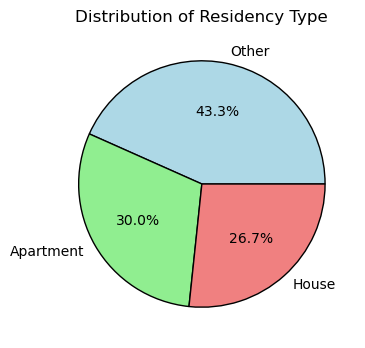

In [30]:
Residence_counts = df['ResidencyType'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(Residence_counts.values, labels=Residence_counts.index, autopct='%1.1f%%', 
        colors=['lightblue', 'lightgreen', 'lightcoral'], wedgeprops={'edgecolor': 'black'})

plt.title("Distribution of Residency Type")

plt.show()

The donut chart shows that 83.3% of the properties are premium, while the remaining 16.7% are non-premium.

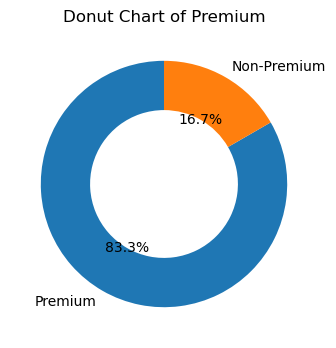

In [32]:

premium_counts = df['Premium'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(premium_counts, labels=premium_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
plt.title('Donut Chart of Premium')
plt.show()


The count plot indicates that 1 BHK properties have the highest share among all property types in Delhi when compared to the total properties available in the city.

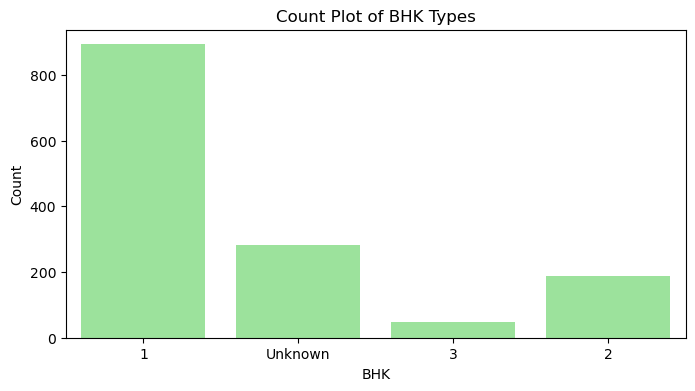

In [36]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df['BHK'], color='lightgreen')
plt.title('Count Plot of BHK Types')
plt.xlabel('BHK')
plt.ylabel('Count')
plt.show()

UNIVARIATE ANALYSIS FOR NUMERICAL DATA:

In [38]:
df.head(2)

,Unnamed: 0,Furnishing_status,OperatingTime,SecurityDeposit,Premium,Area,BHK,Owner,ResidencyType
0,0,Semi-Furnished,2005,10000,Premium,"NEB Valley Society, Saket",1,Nagpal Associates,Other
1,1,Semi-Furnished,2000,10000,Premium,"Project Amar Colony, Lajpat Nagar 4",Unknown,Bhalla Properties,Apartment


The histogram shows that the security deposit starts from 4000, but around 400 properties have a security deposit of 10,000, indicating a concentration at this value. However, this does not mean that other security deposit values are absent, just that they are less frequent.

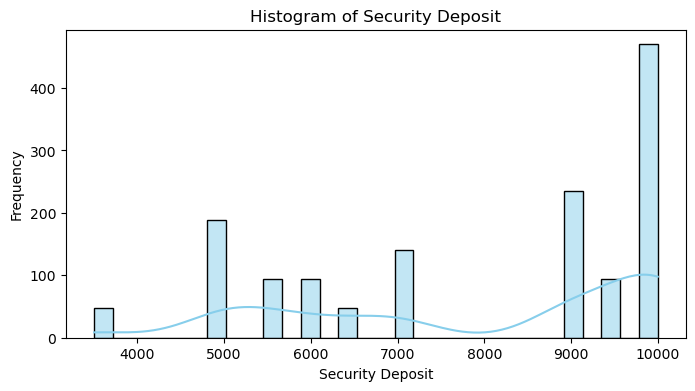

In [40]:
plt.figure(figsize=(8, 4))
sns.histplot(df['SecurityDeposit'], kde=True, bins=30, color='skyblue')
plt.title('Histogram of Security Deposit')
plt.xlabel('Security Deposit')
plt.ylabel('Frequency')
plt.show()

The histogram shows that agencies started operations since 2000, with noticeable peaks in 2000, 2005, 2010, 2014, and 2016. However, the frequency of agencies founded in these years is lower compared to 2000, which had the highest peak. In the remaining years, no new agencies were established.

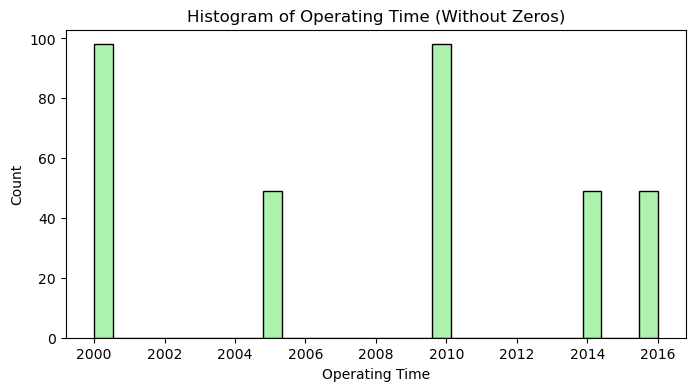

In [39]:


# Remove 0 values
df_filtered = df[df['OperatingTime'] > 0]

plt.figure(figsize=(8, 4))
sns.histplot(df_filtered['OperatingTime'], bins=30, color='lightgreen')
plt.title('Histogram of Operating Time (Without Zeros)')
plt.xlabel('Operating Time')
plt.ylabel('Count')

plt.show()



BIVARIATE ANALYSIS:

CATEGORICAL & CATEGORICAL VARIABLES:

The stacked bar chart shows that for 1 BHK properties, there are 150 furnished, 450 semi-furnished, and the remaining are unfurnished. In 2 BHK properties, within a total of 200 properties, all four categories (furnished, semi-furnished, unfurnished, and unknown) have an equal share. For 3 BHK properties, all are unfurnished. Additionally, there is an 'Other' category where the BHK type is not mentioned, consisting of around 50 semi-furnished** and 250 unfurnished properties."

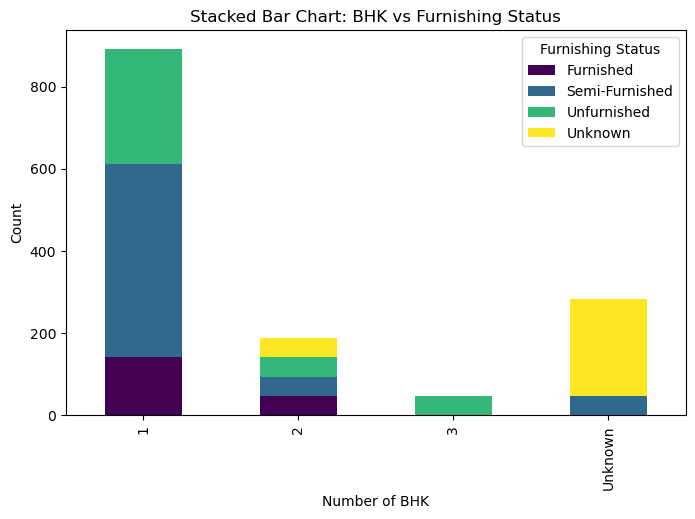

In [42]:
df_crosstab = pd.crosstab(df['BHK'], df['Furnishing_status'])

df_crosstab.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')
plt.title('Stacked Bar Chart: BHK vs Furnishing Status')
plt.xlabel('Number of BHK')
plt.ylabel('Count')
plt.legend(title='Furnishing Status')
plt.show()


CONTINUOUS & CONTINUOUS :

The correlation matrix shows that the security deposit and operating time of the agency have correlation values of 1 and 0.28, indicating a perfect correlation (1) in one instance and a weak positive correlation (0.28) in another, suggesting that while there is some relationship, it is not consistently strong.

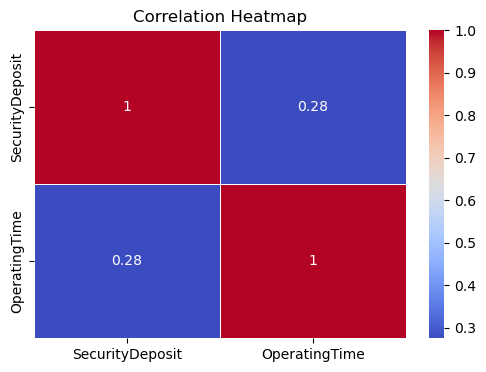

In [44]:

corr_matrix = df[['SecurityDeposit', 'OperatingTime']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


CONTINUOUS & CATEGORICAL VARIABLES:

The strip plot illustrates the relationship between bedrooms and security deposit. 1 BHK properties have security deposits ranging from 1,500 to 10,000, while unknown BHKs fall between 3,000 and 10,000. 2 BHK properties are observed at 1,000 and 7,000, whereas 3 BHK properties start from 10,000, indicating a trend where higher BHKs generally have higher security deposits.

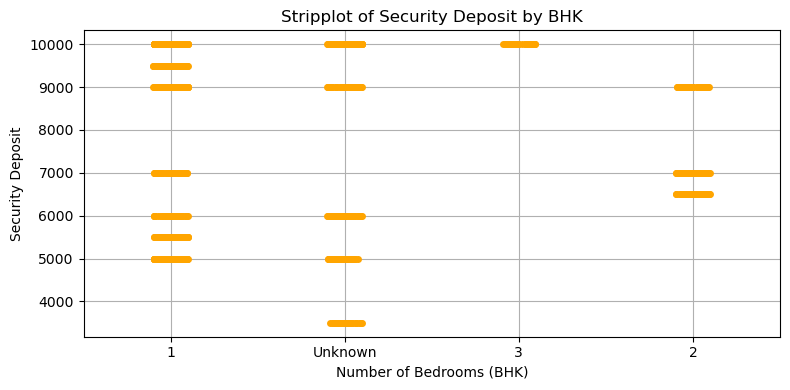

In [69]:
plt.figure(figsize=(8, 4))
sns.stripplot(x=df['BHK'], y=df['SecurityDeposit'], color='orange', jitter=True, dodge=True)

plt.title('Stripplot of Security Deposit by BHK')
plt.xlabel('Number of Bedrooms (BHK)')
plt.ylabel('Security Deposit')
plt.grid(True)
plt.tight_layout()
plt.show()


The scatter plot visually represents the relationship between security deposit, bedroom count, and area, making it easier to identify trends and help individuals choose properties based on their specific requirements.

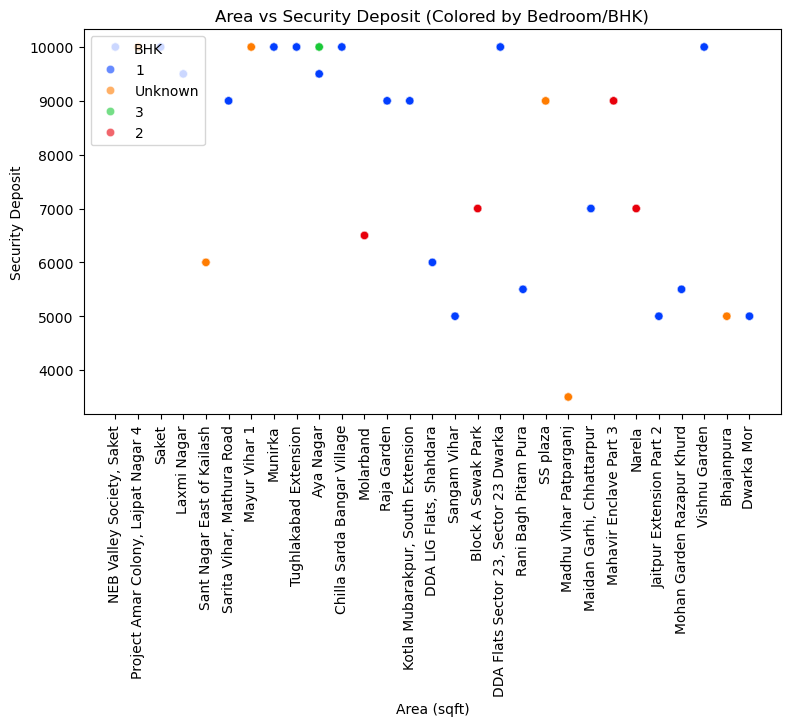

In [52]:
plt.figure(figsize=(9, 5))
sns.scatterplot(x=df['Area'], y=df['SecurityDeposit'], hue=df['BHK'], palette='bright', alpha=0.6)
plt.title('Area vs Security Deposit (Colored by Bedroom/BHK)')
plt.xlabel('Area (sqft)')
plt.ylabel('Security Deposit')
plt.xticks(rotation=90)
plt.legend(title='BHK', loc='upper left')
plt.show()


**CONCLUSION**:-
The analysis of rental properties in **New Delhi** reveals that **1 BHK properties** dominate the market, while **2 BHKs have an equal share across furnishing types**, and **3 BHKs are entirely unfurnished**. **Security deposits start from ₹4,000**, with a peak around **₹10,000**, and **higher BHKs generally require higher deposits**. **Agencies have been operating since 2000**, with peaks in **2000, 2005, 2010, 2014, and 2016**, but their correlation with security deposits is weak (**0.28**). The **donut chart highlights that 83.3% of properties are premium**, reflecting a preference for high-end rentals. The scatter plot further illustrates the relationship between **bedrooms, area, and security deposit**, helping potential tenants identify suitable properties.